##**Construyendo un Sistema de Recomendación de Productos con Filtrado Colaborativo:**

Vamos a profundizar en la construcción de un sistema de recomendación de productos con el que podemos dirigirnos mejor a los clientes, utilizando recomendaciones de productos que se adaptan a los clientes individuales. Los estudios han demostrado que las recomendaciones de productos personalizadas mejoran las tasas de conversión y de retención de clientes.

Un sistema de recomendación de productos es un sistema cuyo objetivo es predecir y recopilar una lista de artículos que probablemente comprará un cliente. Los sistemas de recomendación han ganado mucha popularidad en los últimos años y se han desarrollado e implementado para diversos casos de uso comercial

Por ejemplo,

- El proveedor de servicios multimedia Netflix utiliza sistemas de recomendación para recomendar a los usuarios individuales películas o programas de televisión que es probable que vean.
- La empresa de comercio electrónico Amazon utiliza sistemas de recomendación para predecir y mostrar una lista de productos que el cliente probablemente comprará
- El servicio de streaming de música, Pandora, utiliza sistemas de recomendación de música para sus oyentes.
- El uso de un sistema de recomendación no se detiene aquí. También puede utilizarse para recomendar a los usuarios artículos, noticias o libros relacionados
Con el potencial de ser utilizados en una variedad de áreas, los sistemas de recomendación juegan un papel crítico en muchos negocios, especialmente en los de comercio electrónico y medios de comunicación, ya que impactan directamente en los ingresos por ventas y en el compromiso de los usuarios

Generalmente, hay dos maneras de desarrollar una lista de recomendaciones:

1. **Filtrado Colaborativo:**

El método de filtrado colaborativo se basa en los comportamientos anteriores de los usuarios, como las páginas que han visto, los productos que han comprado o las valoraciones que han dado a diferentes artículos. El método de filtrado colaborativo utiliza estos datos para encontrar similitudes entre usuarios o artículos, y recomienda a los usuarios los artículos o contenidos más similares.

La hipótesis básica del método de filtrado colaborativo es que quienes han visto o comprado contenidos o productos similares en el pasado probablemente verán o comprarán tipos de contenidos o productos similares en el futuro.

Así, basándose en esta suposición, si una persona compró los artículos A, B y C y otra persona compró los artículos A, B y D en el pasado, es probable que la primera persona compre el artículo D y la otra persona compre el artículo C, ya que comparten muchas similitudes entre sí

2. **Filtrado Basado en Contenido:**

Por otro lado, el filtrado basado en el contenido produce una lista de recomendaciones basada en las características de un artículo o de un usuario. Suele examinar las palabras clave que describen las características de un artículo. La hipótesis básica del método de filtrado basado en el contenido es que los usuarios probablemente verán o comprarán artículos similares a los que han comprado o visto en el pasado

Por ejemplo, si un usuario ha escuchado algunas canciones en el pasado, el método de filtrado basado en el contenido recomendará tipos de canciones similares que comparten características parecidas a las que el usuario ya ha escuchado

Como se ha mencionado, un algoritmo de filtrado colaborativo se utiliza para recomendar productos basándose en el historial de comportamiento de los usuarios y en las similitudes entre ellos. El primer paso para implementar un algoritmo de filtrado colaborativo para un sistema de recomendación de productos es construir una matriz usuario-elemento

Una matriz usuario-elemento comprende usuarios individuales en las filas y elementos individuales en las columnas. Será más fácil de explicar con un ejemplo. Observe la siguiente matriz

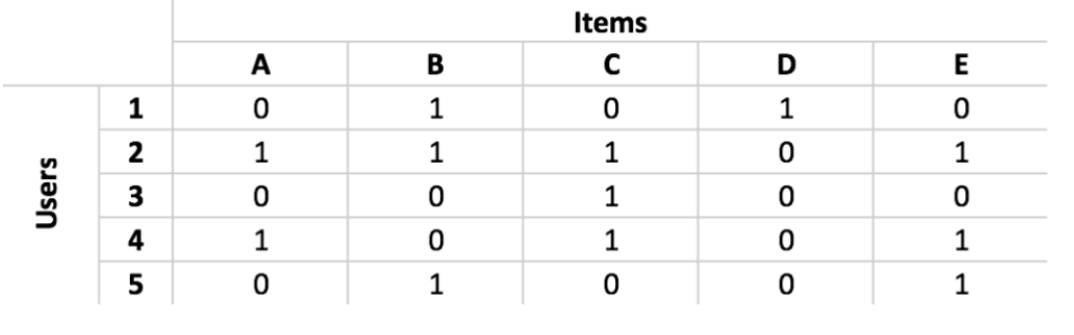

Las filas de esta matriz representan a cada usuario y las columnas a cada elemento. Los valores de cada celda representan si el usuario en cuestión ha comprado o no el elemento en cuestión. Por ejemplo, el usuario 1 ha comprado los artículos B y D y el usuario 2 ha comprado los artículos A, B, C y E

Para construir un sistema de recomendación de productos basado en el filtrado colaborativo, necesitamos construir primero este tipo de matriz usuario-elemento. Con esta matriz usuario-elemento, el siguiente paso para construir un sistema de recomendación de productos basado en el filtrado colaborativo es calcular las similitudes entre los usuarios

Para medir las similitudes, se suele utilizar la similitud de los cosenos. La ecuación para calcular la similitud del coseno entre dos usuarios es la siguiente

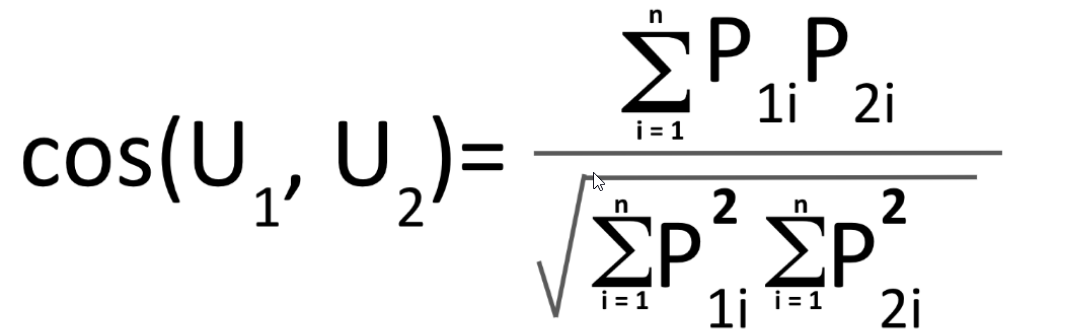

En esta ecuación, U1 y U2 representan al usuario 1 y al usuario 2. P1i y P2i representan cada producto, i, que el usuario 1 y el usuario 2 han comprado. Si utilizas esta ecuación, obtendrás 0,353553 como la similitud del coseno entre los usuarios 1 y 2 en el ejemplo anterior y 0,866025 como la similitud del coseno entre los usuarios 2 y 4.

Como puede imaginar, cuanto mayor sea la similitud del coseno, más parecidos serán los dos usuarios. Así, en nuestro ejemplo, los usuarios 2 y 4 son más similares entre sí que los usuarios 1 y 2. Por último, cuando se utiliza un algoritmo de filtrado colaborativo para las recomendaciones de productos, se pueden adoptar dos enfoques: un enfoque basado en el usuario y un enfoque basado en el elemento

Como sus nombres sugieren, el enfoque del filtrado colaborativo basado en el usuario utiliza las similitudes entre los usuarios. Por otro lado, el enfoque de filtrado colaborativo basado en el elemento utiliza las similitudes entre los elemento. Esto significa que cuando calculamos las similitudes entre los dos usuarios en el filtrado colaborativo del enfoque basado en el usuario, tenemos que construir y utilizar una matriz usuario-elemento, como hemos comentado anteriormente

Sin embargo, para el enfoque basado en elementos, necesitamos calcular las similitudes entre los dos elementos, y esto significa que necesitamos construir y utilizar una matriz de elemento a usuario, que podemos obtener simplemente transponiendo la matriz de usuario a elemento.

Vamos a discutir cómo construir un sistema de recomendación de productos utilizando Python. Comenzaremos esta sección analizando algunos datos de negocios de comercio electrónico y luego discutiremos los dos enfoques para construir un sistema de recomendación de productos con filtrado colaborativo

In [1]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Online Retail.xlsx      


In [3]:
import pandas as pd
df = pd.read_excel(io='Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Hay registros con valores negativos en la columna Cantidad, que representan pedidos cancelados. Ignoremos y eliminemos estos registros. Podemos filtrar todos estos registros en nuestro DataFrame simplemente eligiendo los Quantity que sean mayores a 0

In [4]:
df = df.loc[df['Quantity'] > 0]

##Preparación de los Datos:

Antes de sumergirnos en la construcción de un motor de recomendación de productos utilizando un algoritmo de filtrado colaborativo, tenemos que hacer el siguiente par de cosas:

- Gestionar los valores NaN en el conjunto de datos.
- Construir una matriz usuario-elemento.

En primer lugar, tenemos que gestionar los valores "NaN" de nuestro conjunto de datos, especialmente los "NaN" del campo "CustomerID". Sin los valores correctos en el campo CustomerID, no podemos construir un sistema de recomendación adecuado, ya que el algoritmo de filtrado colaborativo depende de los datos históricos de compra de artículos de clientes individuales.

En segundo lugar, necesitamos construir una matriz usuario-elemento antes de poder implementar el algoritmo de filtrado colaborativo para la recomendación de productos. La matriz usuario-elemento es simplemente una tabla de datos, en la que cada columna representa cada producto o elemento, cada fila representa un cliente y el valor de cada celda representa si el cliente en cuestión ha comprado o no el producto en cuestión.

#**Gestión de kis NaN en el campo CustomerID:**

Si observamos los datos con detenimiento, nos daremos cuenta de que hay algunos registros sin identificación de cliente. Como tenemos que construir una matriz de elementos de clientes en la que cada fila es específica para cada cliente, no podemos incluir esos registros sin CustomerID en nuestros datos.

Veamos primero cuántos registros no tienen identificación de cliente. Haga una sumatoria de todos los valores nan para CustomerID en la siguiente celda

Como puede ver en esta salida, hay 133.361 registros sin identificación de cliente. Y algunos de los datos a los que les falta la identificación del cliente tienen este aspecto:

In [5]:
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


Ahora que sabemos que hay registros con entradas de identificación de clientes que faltan, tenemos que excluirlos del análisis posterior. Una forma de eliminarlos de nuestro DataFrame es utilizar la función dropna. Utiliza dicho metodo para eliminarlos

In [6]:
df = df.dropna(subset=['CustomerID'])

#**Construir una matriz de elemento para el cliente:**

Los datos que tenemos ahora representan artículos individuales comprados por los clientes. Sin embargo, para construir un sistema de recomendación de productos con un algoritmo de filtrado colaborativo, necesitamos tener datos en los que cada registro contenga información sobre qué artículo ha comprado cada cliente.

Vamos a transformar los datos en una matriz usuario-elemento, donde cada fila representa un cliente y las columnas corresponden a diferentes productos.

En la siguiente celda, haz un pivot_table de pandas con los siguientes parametros:

In [7]:
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como puede ver, ahora tenemos una matriz en la que cada fila representa las cantidades totales compradas de cada producto para cada cliente.

Ahora, codifiquemos 0-1 estos datos, de manera que un valor de 1 significa que el producto dado fue comprado por el cliente dado, y un valor de 0 significa que el producto dado nunca fue comprado por el cliente dado. Observe el siguiente código. Este procedimiento puede realizarse de varias formas, le recomendamos hacerlo con una función lambda y con el metodo applymap de pandas. Asigne el resultado a la misma variable anterior customer_item_matrix

Estamos recomendando la función "applymap", que aplica una función determinada a cada elemento de un DataFrame.

La función Lambda que estamos recomendando en este código simplemente codifica todos los elementos cuyos valores son mayores que 0 con 1, y el resto con 0.

In [8]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora tenemos un array de elementos del cliente que podemos utilizar para el algoritmo de filtrado colaborativo. Pasemos ahora a la construcción de motores de recomendación de productos.

#**Filtrado Colaborativo:**

Exploraremos dos enfoques para construir nuestro recomendador basado en el usuario y en el elemento. En el enfoque basado en el usuario, calculamos las similitudes entre los usuarios basándonos en su historial de compras de artículos. En el enfoque basado en los artículos, por otro lado, calculamos las similitudes entre los artículos en función de qué artículos se compran a menudo junto con otros.

Para medir la similitud entre usuarios o entre artículos, utilizaremos el método cosine_similarity del paquete scikit-learn. Puedes importar esta función utilizando el siguiente código:

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

Esta función cosine_similarity del paquete sklearn calcula las similitudes del coseno en pares en los datos dados.

#**Filtros de Colaboración Basados en eL Usuario y Recomendaciones:**

Para construir un algoritmo de filtrado colaborativo basado en el usuario, necesitamos calcular las similitudes del coseno entre los usuarios. Para ello haga lo siguiente: asigne a una variable llamada user_user_sim_matrix un nuevo dataframe de pandas, que puedes crear con el comando pd.DataFrame() y pasale como parametro la funcion de scikit-learn que acabamos de importar y pasandole como parametro nuestra matriz customer_item_matrix

In [10]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4335,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4336,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4337,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


Como puedes ver en este código, estamos utilizando la función cosine_similarity del módulo metrics.pairwise del paquete sklearn. Esta función calcula las similitudes del coseno en pares entre las muestras y produce los resultados como un tipo de array.

A continuación, creamos un pandasDataFrame con este array de salida y lo almacenamos en una variable llamada user_user_sim_matrix, que significa array de similitudes usuario-usuario.

Como puedes ver, el índice y los nombres de las columnas no son fáciles de entender. Como cada columna y fila del índice representa a clientes individuales, vamos a renombrar el índice y las columnas usando el siguiente código:

In [11]:
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


In [12]:
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix

<ipython-input-12-78ab994c9d56>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_user_sim_matrix['CustomerID'] = customer_item_matrix.index


CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


Veamos con más detalle esta matriz de similitudes entre usuarios. Como se puede imaginar, la similitud del coseno entre un cliente y él mismo es 1, y esto es lo que podemos observar en esta matriz de similitud. Los elementos diagonales de esta matriz de similitudes entre usuarios tienen valores de 1.

El resto representa la similitud del coseno entre dos clientes. Por ejemplo, la medida de similitud del coseno entre los clientes 12347 y 12348 es 0,063022. Por otro lado, la similitud del coseno entre los clientes "12347" y "12349" es de 0,046130. Esto sugiere que el cliente 12348 es más similar al cliente 12347 que el cliente 12349, basándose en los productos que compraron. De este modo, podemos saber fácilmente qué clientes son similares a otros, y qué clientes han comprado artículos similares a otros.

Estas medidas de similitud de pares de coseno son las que utilizaremos para las recomendaciones de productos. Vamos a trabajar eligiendo un cliente como ejemplo. Primero clasificaremos los clientes más parecidos al cliente con ID 12350, para hacer esto

- con iloc selecciona el id con valor 12350.0
- una vez seleccionado organizalos en orden descendente con el metodo sort_values de pandas

In [13]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
             ...   
14885.0    0.000000
14886.0    0.000000
14887.0    0.000000
14888.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 4339, dtype: float64

Estos son los 10 clientes más similares al cliente 12350. Vamos a elegir el cliente 17935 y a discutir cómo podemos recomendar productos utilizando estos resultados.

La estrategia es la siguiente.

- Primero, tenemos que identificar los artículos que los clientes 12350 y 17935 ya han comprado.
- A continuación, busquemos los productos que el cliente objetivo 17935 no ha comprado, pero el cliente 12350 sí.
- Dado que estos dos clientes han comprado artículos similares en el pasado, supondremos que el cliente objetivo 17935 tiene una alta probabilidad de comprar los artículos que no ha comprado, pero el cliente 12350 sí.
- Por último, vamos a utilizar esta lista de artículos y a recomendárselos al cliente objetivo 17935.
Veamos primero cómo podemos recuperar los artículos que el cliente 12350 ha comprado en el pasado. El código es el siguiente:

In [14]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[
    customer_item_matrix.loc[12350.0].to_numpy().nonzero()
].index)
items_bought_by_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

Como puedes ver en este código, estamos utilizando la función nonzero(). Esta función devuelve los índices enteros de los elementos no nulos. Utilizando esta función en la matriz customer_item_matrix para el cliente 12350 dado, podemos obtener la lista de elementos que el cliente 12350 ha comprado. Podemos aplicar el mismo código para el cliente objetivo 17935, hazlo en la siguiente linea y asignalo a la variable items_bought_by_B

In [15]:
items_bought_by_B = set(customer_item_matrix.loc[17935.0].iloc[
    customer_item_matrix.loc[17935.0].to_numpy().nonzero()
].index)
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

Ahora tenemos dos conjuntos de artículos que los clientes 12350 y 17935 han comprado. Utilizando una simple operación de conjunto, podemos encontrar los artículos que el cliente 12350 ha comprado, pero el cliente 17935 no. Haz una resta entre items_bought_by_A y items_bought_by_B y asignalo a la variable items_to_recommend_to_B

In [16]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

Para obtener las descripciones de estos elementos, puede utilizar el siguiente código:

In [17]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B),
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')JJJ


,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


Utilizando el filtrado colaborativo basado en el usuario, hemos hablado de cómo podemos hacer recomendaciones de productos específicos para clientes individuales. Puede personalizar e incluir en sus mensajes de marketing estos productos que cada cliente objetivo es probable que compre, lo que puede generar más conversiones de sus clientes.

Como se ha comentado hasta ahora, utilizando un algoritmo de filtrado colaborativo basado en el usuario, puede hacer fácilmente recomendaciones de productos para los clientes objetivo.

Para seguir con el mismo ejercicio puede hacer un filtrado colaborativo basado en elementos.

Esperamos haya aprendido de este reto!